A1. Evalution of intraclass spread and interclass distances

In [36]:
import pandas as pd
import numpy as np
from numpy.linalg import norm


def load_and_clean_data(file_path, sheet_name="thyroid0387_UCI"):
    """
    Load thyroid dataset and clean missing values.
    """
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df.replace("?", np.nan)  # replace '?' with NaN

    # Drop ID column (not useful for classification)
    if "Record ID" in df.columns:
        df.drop(columns=["Record ID"])

    # Fill missing values appropriately
    for col in df.columns:
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0])  # categorical → mode
        else:
            df[col].fillna(df[col].median())  # numeric → median
    return df

def compute_centroid(data):
    """Return centroid (mean vector) of given data."""
    return np.mean(data, axis=0)

def compute_spread(data):
    """Return spread (std deviation vector) of given data."""
    return np.std(data, axis=0)

def compute_centroid_distance(c1, c2):
    """Return Euclidean distance between two centroids."""
    return norm(c1 - c2)

def evaluate_class_spread_and_distance(df, label_col="Condition", class1=None, class2=None):
    """
    Compute centroid, spread, and centroid distance for 2 classes.
    """
    numeric_features = df.select_dtypes(include=[np.number])
    labels = df[label_col]

    unique_classes = labels.unique()
    if class1 is None or class2 is None:
        class1, class2 = unique_classes[:2]  # pick first 2 classes by default

    # Extract data for chosen classes
    data1 = numeric_features[labels == class1].values
    data2 = numeric_features[labels == class2].values

    centroid1 = compute_centroid(data1)
    centroid2 = compute_centroid(data2)
    spread1 = compute_spread(data1)
    spread2 = compute_spread(data2)
    dist = compute_centroid_distance(centroid1, centroid2)

    return centroid1, spread1, centroid2, spread2, dist


# -------------------------------
# MAIN EXECUTION
# -------------------------------

file_path = "/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx"
df = load_and_clean_data(file_path)

# Compare between first two classes in dataset
cent1, spread1, cent2, spread2, dist = evaluate_class_spread_and_distance(df)

print("Centroid of Class 1:\n", cent1)
print("Spread of Class 1:\n", spread1)
print("\nCentroid of Class 2:\n", cent2)
print("Spread of Class 2:\n", spread2)
print("\nInterclass Centroid Distance:", dist)


Centroid of Class 1:
 [8.52966982e+08 8.08512775e+01]
Spread of Class 1:
 [7.57692178e+06 1.37779962e+03]

Centroid of Class 2:
 [8.51108311e+08 4.09647059e+01]
Spread of Class 2:
 [6.84469552e+06 1.67159290e+01]

Interclass Centroid Distance: 1858670.478141801


/tmp/ipython-input-238873146.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("?", np.nan)  # replace '?' with NaN


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A2. Feature Histogram, Mean, Variance


Selected Feature: pslist.nproc


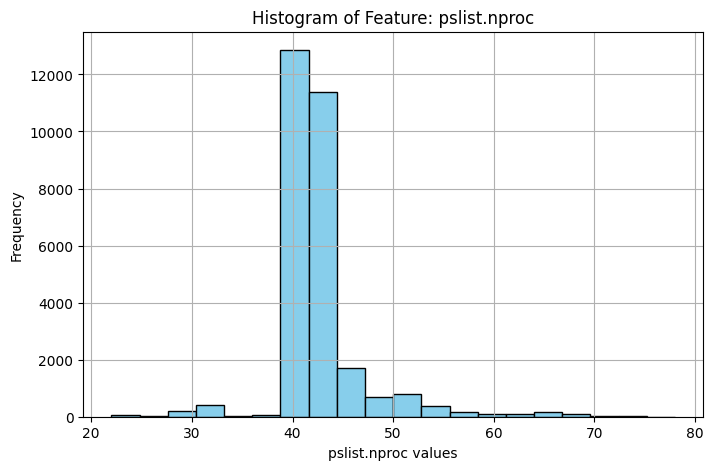


Mean of 'pslist.nproc': 42.5408
Variance of 'pslist.nproc': 21.8364


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/ML Datasets/MalMem2022.csv'
df = pd.read_csv(file_path)

numeric_cols = df.select_dtypes(include=[np.number]).columns
feature_name = numeric_cols[0]  #pick the first numeric feature
feature_data = df[feature_name].dropna()

print(f"\nSelected Feature: {feature_name}")

hist_values, bin_edges = np.histogram(feature_data, bins=20)

plt.figure(figsize=(8, 5))
plt.hist(feature_data, bins=20, color='skyblue', edgecolor='black')
plt.title(f"Histogram of Feature: {feature_name}")
plt.xlabel(f"{feature_name} values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

mean_val = np.mean(feature_data)
var_val = np.var(feature_data)

print(f"\nMean of '{feature_name}': {mean_val:.4f}")
print(f"Variance of '{feature_name}': {var_val:.4f}")


A3. Minkowski Distance

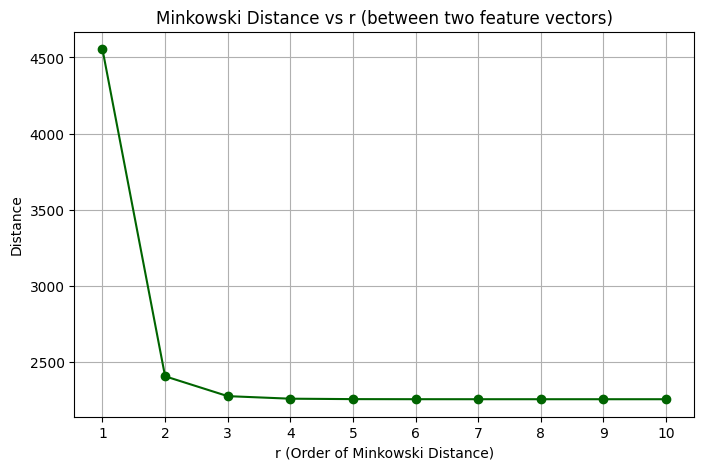

Minkowski Distance (r=1): 4553.7237
Minkowski Distance (r=2): 2406.5875
Minkowski Distance (r=3): 2276.2385
Minkowski Distance (r=4): 2259.4817
Minkowski Distance (r=5): 2256.6810
Minkowski Distance (r=6): 2256.1437
Minkowski Distance (r=7): 2256.0318
Minkowski Distance (r=8): 2256.0073
Minkowski Distance (r=9): 2256.0017
Minkowski Distance (r=10): 2256.0004


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/ML Datasets/MalMem2022.csv'
df = pd.read_csv(file_path)

#extract only numeric feature columns
numeric_df = df.select_dtypes(include=[np.number])

#select the first and second row
vec1 = numeric_df.iloc[0].values
vec2 = numeric_df.iloc[1].values

def minkowski_distance(x, y, r):
    return np.sum(np.abs(x - y) ** r) ** (1 / r) #minowski distance formula

r_values = list(range(1, 11))
distances = [minkowski_distance(vec1, vec2, r) for r in r_values]

plt.figure(figsize=(8, 5))
plt.plot(r_values, distances, marker='o', linestyle='-', color='darkgreen')
plt.title("Minkowski Distance vs r (between two feature vectors)")
plt.xlabel("r (Order of Minkowski Distance)")
plt.ylabel("Distance")
plt.grid(True)
plt.xticks(r_values)
plt.show()

for r, d in zip(r_values, distances):
    print(f"Minkowski Distance (r={r}): {d:.4f}")


*A4* Train-Test Split

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split


def load_and_clean_data(file_path, sheet_name="thyroid0387_UCI"):
    """
    Load and clean dataset:
    - Replace '?' with NaN
    - Fill categorical with mode
    - Fill numeric with median
    """
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df.replace("?", pd.NA, inplace=True)

    # Drop Record ID if present
    if "Record ID" in df.columns:
        df.drop(columns=["Record ID"], inplace=True)

    # Fill missing values
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

def prepare_train_test(df, label_col="Condition", class1=None, class2=None, test_size=0.3):
    """
    Prepares X_train, X_test, y_train, y_test for classification
    considering only two classes.
    """
    # Numeric features only
    X = df.select_dtypes(include=[np.number])
    y = df[label_col]

    # Keep only two classes
    unique_classes = y.unique()
    if class1 is None or class2 is None:
        class1, class2 = unique_classes[:2]

    subset = df[(y == class1) | (y == class2)]
    X = subset.select_dtypes(include=[np.number])
    y = subset[label_col]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    return X_train, X_test, y_train, y_test


# -------------------------------
# MAIN EXECUTION
# -------------------------------

file_path = "/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx"
df = load_and_clean_data(file_path)

# Split into train and test
X_train, X_test, y_train, y_test = prepare_train_test(df)

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Classes in train set:", y_train.unique())


Train set size: 4799
Test set size: 2057
Classes in train set: ['NO CONDITION' 'S']


/tmp/ipython-input-1812723363.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


A5. Training kNN Classifier

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

file_path = "/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Drop ID column
if "Record ID" in df.columns:
    df.drop(columns=["Record ID"], inplace=True)

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# PREPARE FEATURES AND LABELS
label_col = "Condition"
unique_classes = df[label_col].unique()
class1, class2 = unique_classes[:2]   # pick any 2 classes

binary_df = df[df[label_col].isin([class1, class2])]

X = binary_df.select_dtypes(include=[np.number]).values
y = binary_df[label_col].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# TRAIN & EVALUATE KNN (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nkNN classifier trained successfully (k=3)")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



kNN classifier trained successfully (k=3)
Test Accuracy: 0.9981

Classification Report:
               precision    recall  f1-score   support

NO CONDITION       1.00      1.00      1.00      2031
           S       1.00      0.85      0.92        26

    accuracy                           1.00      2057
   macro avg       1.00      0.92      0.96      2057
weighted avg       1.00      1.00      1.00      2057



/tmp/ipython-input-2214924974.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("?", np.nan, inplace=True)


A6. Testing accuracy of A5 KNN model

In [42]:
#test the accuracy using score()
test_accuracy = knn.score(X_test, y_test)
print(f"\n Accuracy of kNN on Test Set (using .score()): {test_accuracy:.4f}")



 Accuracy of kNN on Test Set (using .score()): 0.9981


A7. Studying prediction behaviour of classifier for test vectors

In [43]:
all_preds = knn.predict(X_test)
print("\n Predictions for entire test set:")
print(all_preds)

single_vector = X_test[0]
predicted_class = knn.predict([single_vector])[0]
actual_class = y_test[0]

print("\n Prediction for a single test vector:")
print(f"Predicted Class:{predicted_class}")
print(f"Actual Class:{actual_class}")



 Predictions for entire test set:
['NO CONDITION' 'NO CONDITION' 'NO CONDITION' ... 'NO CONDITION'
 'NO CONDITION' 'S']

 Prediction for a single test vector:
Predicted Class:NO CONDITION
Actual Class:NO CONDITION


A8. Accuracy vs k Plot

/tmp/ipython-input-2200301182.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("?", np.nan, inplace=True)


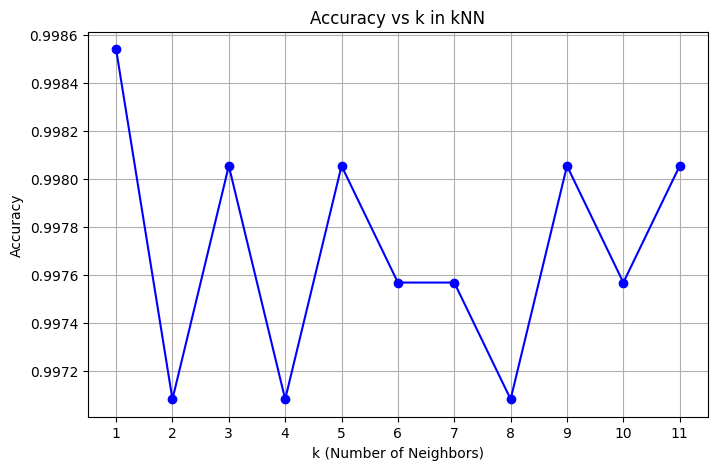

Accuracy for each k:
k=1: Accuracy = 0.9985
k=2: Accuracy = 0.9971
k=3: Accuracy = 0.9981
k=4: Accuracy = 0.9971
k=5: Accuracy = 0.9981
k=6: Accuracy = 0.9976
k=7: Accuracy = 0.9976
k=8: Accuracy = 0.9971
k=9: Accuracy = 0.9981
k=10: Accuracy = 0.9976
k=11: Accuracy = 0.9981


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
file_path = "/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")
df.replace("?", np.nan, inplace=True)

if "Record ID" in df.columns:
    df.drop(columns=["Record ID"], inplace=True)

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# PREPARE FEATURES AND LABELS
label_col = "Condition"
unique_classes = df[label_col].unique()
class1, class2 = unique_classes[:2]   # pick first 2 classes

binary_df = df[df[label_col].isin([class1, class2])]

X = binary_df.select_dtypes(include=[np.number]).values
y = binary_df[label_col].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

accuracies = []
k_values = range(1, 12)  # k = 1 to 11

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="blue")
plt.title("Accuracy vs k in kNN")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print accuracies
print("Accuracy for each k:")
for k, acc in zip(k_values, accuracies):
    print(f"k={k}: Accuracy = {acc:.4f}")


A9. Confusion Matrix & Metrics

/tmp/ipython-input-1354132698.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("?", np.nan, inplace=True)


A9 – Confusion Matrix
[[2031    0]
 [   4   22]]

Classification Report:

              precision    recall  f1-score   support

NO CONDITION       1.00      1.00      1.00      2031
           S       1.00      0.85      0.92        26

    accuracy                           1.00      2057
   macro avg       1.00      0.92      0.96      2057
weighted avg       1.00      1.00      1.00      2057

Overall Accuracy: 0.9981


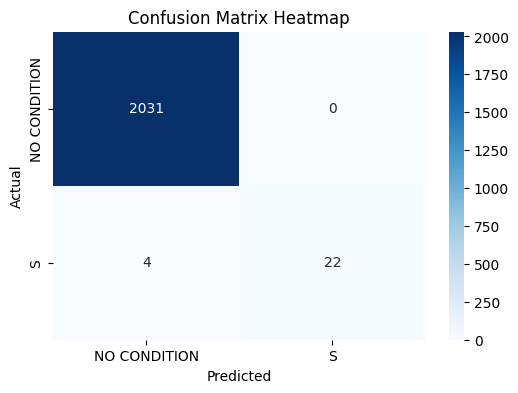

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

file_path = "/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")
df.replace("?", np.nan, inplace=True)

if "Record ID" in df.columns:
    df.drop(columns=["Record ID"], inplace=True)

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

label_col = "Condition"
unique_classes = df[label_col].unique()
class1, class2 = unique_classes[:2]   # take first 2 classes

binary_df = df[df[label_col].isin([class1, class2])]

X = binary_df.select_dtypes(include=[np.number]).values
y = binary_df[label_col].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# TRAIN KNN (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[class1, class2])

print("A9 – Confusion Matrix")
print(cm)

# Classification report (Precision, Recall, F1-score)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=[class1, class2]))

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {acc:.4f}")

# Heatmap visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[class1, class2],
            yticklabels=[class1, class2])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
